In [23]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns


In [18]:
df = pd.read_csv('/iris.csv')
df

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


Text(0, 0.5, 'width')

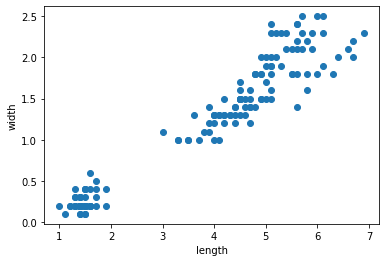

In [4]:
plt.scatter(df['petal.length'],df['petal.width'])
plt.xlabel('length')
plt.ylabel('width')

In [17]:
x = df.drop(columns = ["species"],axis = 1)
y = df.species
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
y = encode.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
wcss_scores = []
for i in range(1,10):
  model = KMeans(n_clusters = i,random_state = 1)
  model.fit(x)
  wcss_scores.append(model.inertia_)


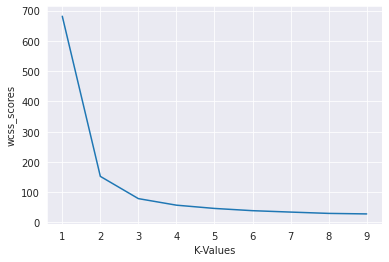

In [24]:
sns.set_style("darkgrid")
plt.plot(range(1,10),wcss_scores)
plt.xlabel("K-Values")
plt.ylabel("wcss_scores")
plt.show()

Clearly we can see that the elbow curve starts at k = 3.Therefore,number of k is 3

In [25]:
model = KMeans(n_clusters = 3,random_state = 1)
y_pred = model.fit_predict(x)

x = x.values

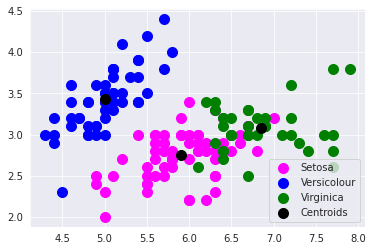

In [27]:
#visualizing the clusters- on the last 2 columns(petal length,petal width)
plt.scatter(x [y_pred == 0,0], x[y_pred == 0,1],
            s = 100, c= 'magenta', label = "Setosa")


plt.scatter(x [y_pred == 1,0], x[y_pred == 1,1],
            s = 100, c= 'blue', label = "Versicolour")

plt.scatter(x [y_pred == 2,0], x[y_pred == 2,1],
            s = 100, c= 'green', label = "Virginica")

#Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[ :,0], model.cluster_centers_[:,1],
            s = 100, c= 'black', label = "Centroids")

plt.legend()
plt.show()